In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os

In [2]:
analysis_K_30= pd.read_csv('../data/analysis_K_30.csv')
analysis_K_30

,K,distance_vans,nb_rebalancings,unmet_demand
0,1,42.850627,23.0,1093.0
1,2,68.754992,40.0,1002.0
2,3,74.724486,53.0,915.0
3,4,90.709258,46.0,996.0
4,5,86.661449,74.0,889.0
5,6,92.540177,82.0,876.0
6,7,87.101173,76.0,845.0
7,8,82.682126,86.0,815.0
8,9,74.098448,73.0,872.0
9,10,80.132480,80.0,857.0


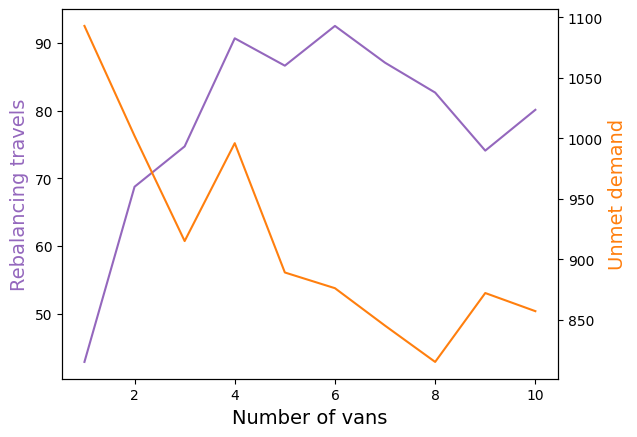

In [31]:
# plot unmet_demand and distance_vans for each K
import matplotlib.pyplot as plt
K=analysis_K_30['K']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(K,analysis_K_30['distance_vans'],color="tab:purple")
# set x-axis label
ax.set_xlabel("Number of vans", fontsize = 14)
# set y-axis label
ax.set_ylabel("Rebalancing travels",
              color="tab:purple",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(K,analysis_K_30['unmet_demand'],color="tab:orange")
ax2.set_ylabel("Unmet demand",color="tab:orange",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('Costs_vs_K.png',
#            format='png',
#            dpi=100,
#            bbox_inches='tight')

In [21]:
from plotly.subplots import make_subplots
import plotly.express as px
# two y axes
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=analysis_K_30['K'], y=analysis_K_30['distance_vans'],
                    mode='lines+markers',
                    name='Rebalancing travels',
                    line=dict(color='dodgerblue'),
                    showlegend=False))
fig.add_trace(go.Scatter(x=analysis_K_30['K'], y=analysis_K_30['unmet_demand'],
                    mode='lines+markers',
                    name='Unmet demand',
                    line=dict(color='firebrick'),
                    showlegend=False),
                    secondary_y=True)
fig.update_yaxes(title_text="Rebalancing travels", secondary_y=False, showline=True, linewidth=1, linecolor='black', showgrid=False, title_font_color='dodgerblue')
fig.update_yaxes(title_text="Unmet demand", secondary_y=True, showline=True, linewidth=1, linecolor='black', showgrid=False, title_font_color='firebrick')
fig.update_xaxes(title_text="Number of vans",showline=True, linewidth=1, linecolor='black', showgrid=False)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
fig.show()
fig.write_image("demand_vs_van.svg")

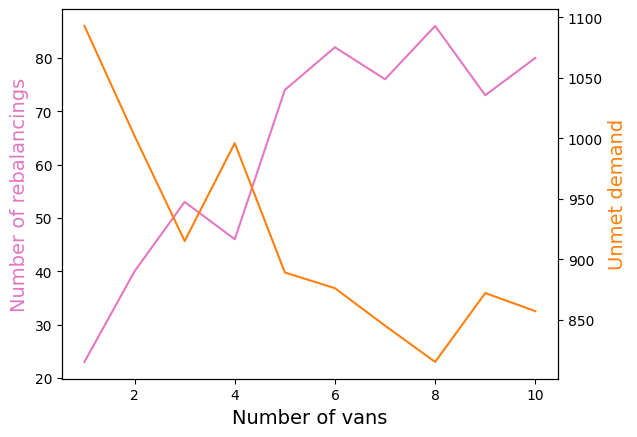

In [29]:
# plot unmet_demand and distance_vans for each K
import matplotlib.pyplot as plt
K=analysis_K_30['K']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(K,analysis_K_30['nb_rebalancings'],color="tab:pink")
# set x-axis label
ax.set_xlabel("Number of vans", fontsize = 14)
# set y-axis label
ax.set_ylabel("Number of rebalancings",
              color="tab:pink",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(K,analysis_K_30['unmet_demand'],color="tab:orange")
ax2.set_ylabel("Unmet demand",color="tab:orange",fontsize=14)
plt.show()
# save the plot as a file
#fig.savefig('Costs_vs_K.png',
#            format='png',
#            dpi=100,
#            bbox_inches='tight')